# Problem 1

In [31]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

In [32]:
real = stats.norm.rvs(loc = 12., scale = 0.4, size = 100000)
fake = [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7]
d = np.append(real, fake)

## A) Identifing bad data

### 1) Exploring the data

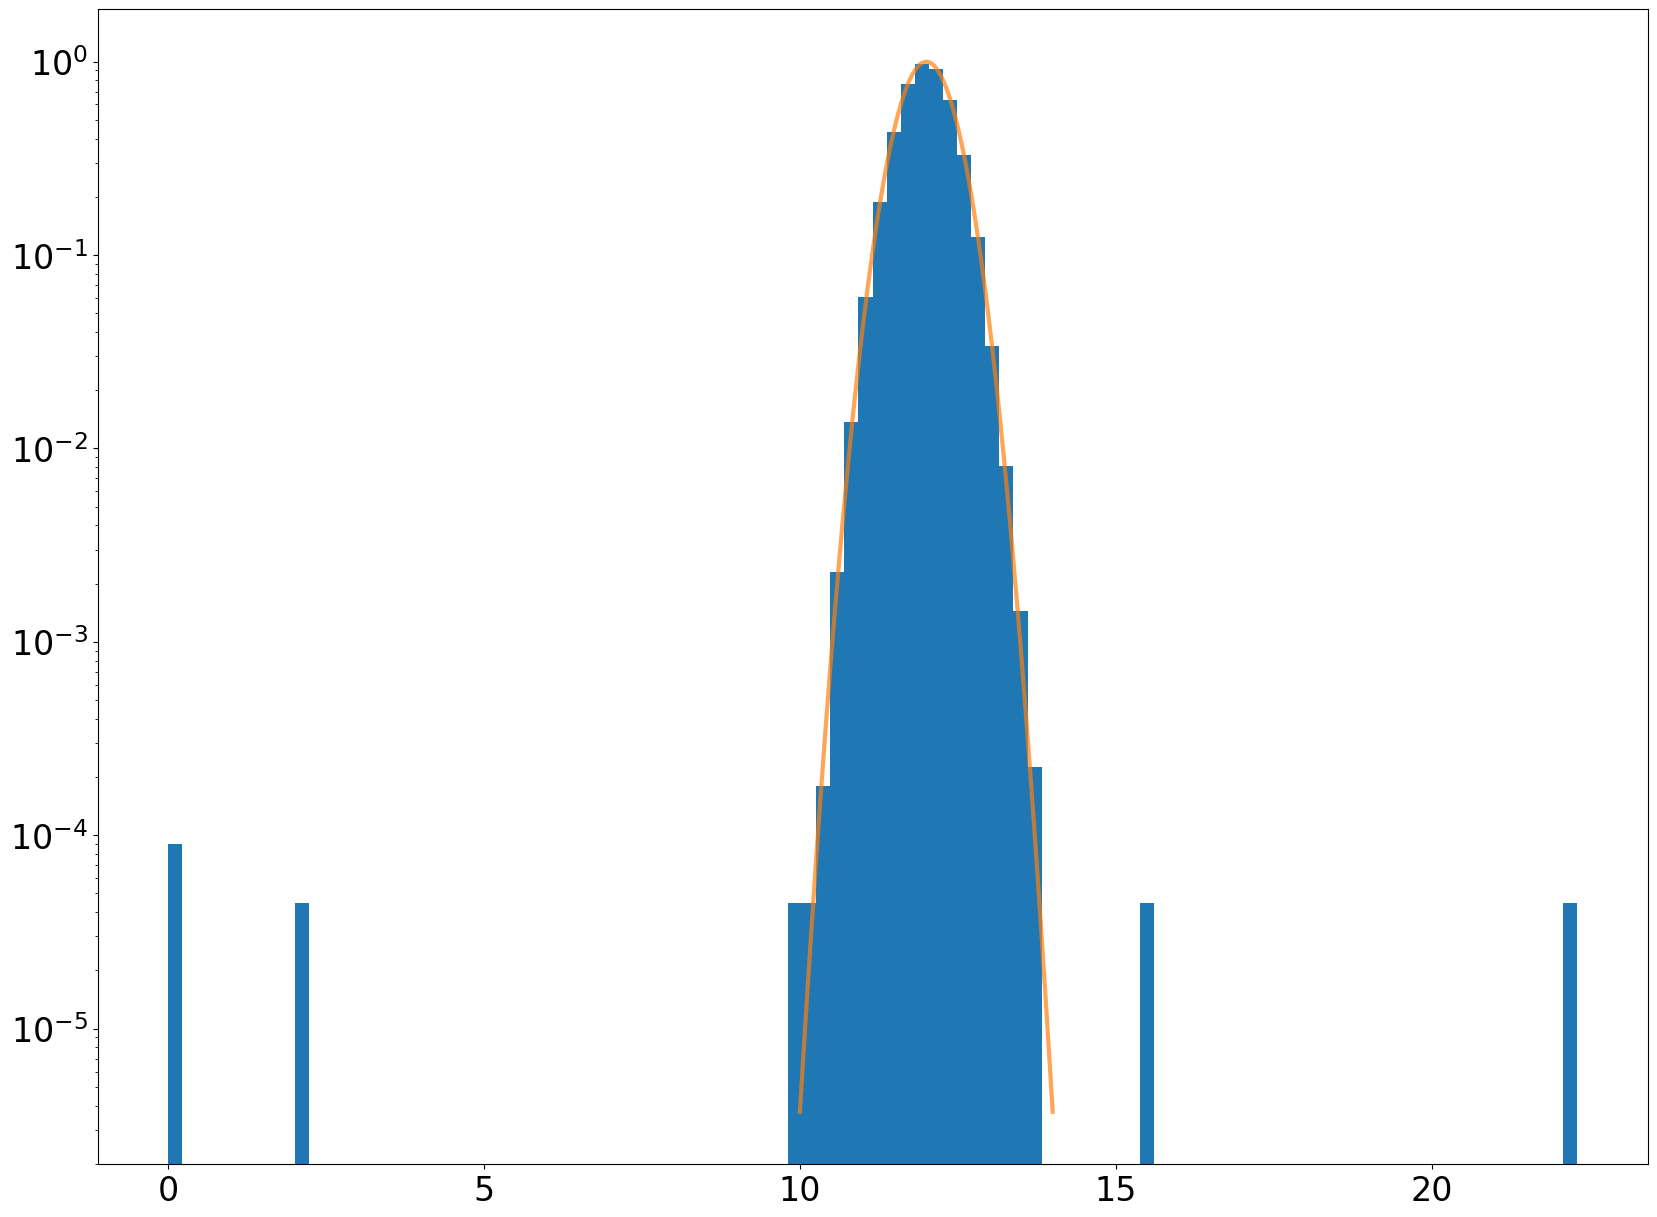

In [33]:
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
x = np.linspace(10, 14, 10000)
ax.plot(x,scipy.stats.norm.pdf(x,scale = 0.4, loc = 12),linewidth = 3,alpha = 0.7)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.show()

We can see from the data that there are clear points along the distribution where the data doesn't match our distribution. We have these peaks where the data is very far off from our gaussian curve

### 2) Statistical Question

Is the probability that this signal was a true measurement and not a glitch from the device less than 5 sigma?

### 3) Restate your question in math

$\frac{1}{3500000} > |\int_{measurment}^{12} \frac{1}{0.4\sqrt{2\pi}} e^{-\frac{1}{2}(\frac{x-12}{0.4}})|$

In [48]:
def sort(real, fake, mean, sd, sigma):
    testGoodTrue = 0
    testBadTrue = 0
    testGoodBad = 0
    testBadBad = 0
    for point in real:
        if point >= mean + sd*sigma or point <= mean -sd*sigma: # thrown out good data
             testGoodBad += 1
        else:
            testGoodTrue += 1
    for point in fake:
        if point >= mean + sd*sigma or point <= mean -sd*sigma: # thrown out fake data
            testBadBad += 1
        else:
            testBadTrue += 1
    return[testGoodTrue, testGoodBad, testBadTrue, testBadBad]

### 4) Tuth table

In [55]:
def makeTable(real,fake,mean,sd,sigma):
    [testGoodTrue, testGoodBad, testBadTrue, testBadBad] = sort(real,fake,mean,sd,sigma)
    dict = {"True T" : {"Your Test Good" : testGoodTrue, "Your Test Bad": testBadTrue}, "Bad T": {"Your Test Good" : testGoodBad, "Your Test Bad":testBadBad }}
    df = pd.DataFrame(dict)
    display(df)


print("Real data points kept: \t\t" + str(testGoodTrue))
print("Real data points discarded: \t" + str(testGoodBad))
print("False data points kept: \t" + str(testBadTrue))
print("False data points discarded: \t" + str(testBadBad))


Real data points kept: 		100000
Real data points discarded: 	0
False data points kept: 	2
False data points discarded: 	6


In [56]:
makeTable(real,fake,12,0.4,5)

,True T,Bad T
Your Test Good,100000,0
Your Test Bad,2,6


## B) How does the number of omissions, where you threw out good data, depend on the statistical threshold you chose and is it a predictable quantity?

In [68]:
#Tables for threshold of 1-5 sigma, every 0.2 sigma
goodtrue = []
goodbad = []
badtrue = []
badbad = []
for i in np.linspace(0,5,26):
    print("Sigma of " + str(i))
    scores = sort(real,fake,12,0.4,i)
    goodtrue.append(scores[0])
    goodbad.append(scores[1])
    badtrue.append(scores[2])
    badbad.append(scores[3])
    makeTable(real,fake,12,0.4,i)

Sigma of 0.0


,True T,Bad T
Your Test Good,0,100000
Your Test Bad,0,8


Sigma of 0.2


,True T,Bad T
Your Test Good,15705,84295
Your Test Bad,0,8


Sigma of 0.4


,True T,Bad T
Your Test Good,31037,68963
Your Test Bad,0,8


Sigma of 0.6000000000000001


,True T,Bad T
Your Test Good,45127,54873
Your Test Bad,0,8


Sigma of 0.8


,True T,Bad T
Your Test Good,57699,42301
Your Test Bad,0,8


Sigma of 1.0


,True T,Bad T
Your Test Good,68295,31705
Your Test Bad,0,8


Sigma of 1.2000000000000002


,True T,Bad T
Your Test Good,77073,22927
Your Test Bad,0,8


Sigma of 1.4000000000000001


,True T,Bad T
Your Test Good,83927,16073
Your Test Bad,0,8


Sigma of 1.6


,True T,Bad T
Your Test Good,89079,10921
Your Test Bad,0,8


Sigma of 1.8


,True T,Bad T
Your Test Good,92829,7171
Your Test Bad,1,7


Sigma of 2.0


,True T,Bad T
Your Test Good,95485,4515
Your Test Bad,1,7


Sigma of 2.2


,True T,Bad T
Your Test Good,97202,2798
Your Test Bad,1,7


Sigma of 2.4000000000000004


,True T,Bad T
Your Test Good,98361,1639
Your Test Bad,1,7


Sigma of 2.6


,True T,Bad T
Your Test Good,99052,948
Your Test Bad,1,7


Sigma of 2.8000000000000003


,True T,Bad T
Your Test Good,99463,537
Your Test Bad,1,7


Sigma of 3.0


,True T,Bad T
Your Test Good,99702,298
Your Test Bad,1,7


Sigma of 3.2


,True T,Bad T
Your Test Good,99849,151
Your Test Bad,1,7


Sigma of 3.4000000000000004


,True T,Bad T
Your Test Good,99922,78
Your Test Bad,1,7


Sigma of 3.6


,True T,Bad T
Your Test Good,99962,38
Your Test Bad,1,7


Sigma of 3.8000000000000003


,True T,Bad T
Your Test Good,99983,17
Your Test Bad,1,7


Sigma of 4.0


,True T,Bad T
Your Test Good,99993,7
Your Test Bad,1,7


Sigma of 4.2


,True T,Bad T
Your Test Good,99998,2
Your Test Bad,1,7


Sigma of 4.4


,True T,Bad T
Your Test Good,99999,1
Your Test Bad,2,6


Sigma of 4.6000000000000005


,True T,Bad T
Your Test Good,100000,0
Your Test Bad,2,6


Sigma of 4.800000000000001


,True T,Bad T
Your Test Good,100000,0
Your Test Bad,2,6


Sigma of 5.0


,True T,Bad T
Your Test Good,100000,0
Your Test Bad,2,6


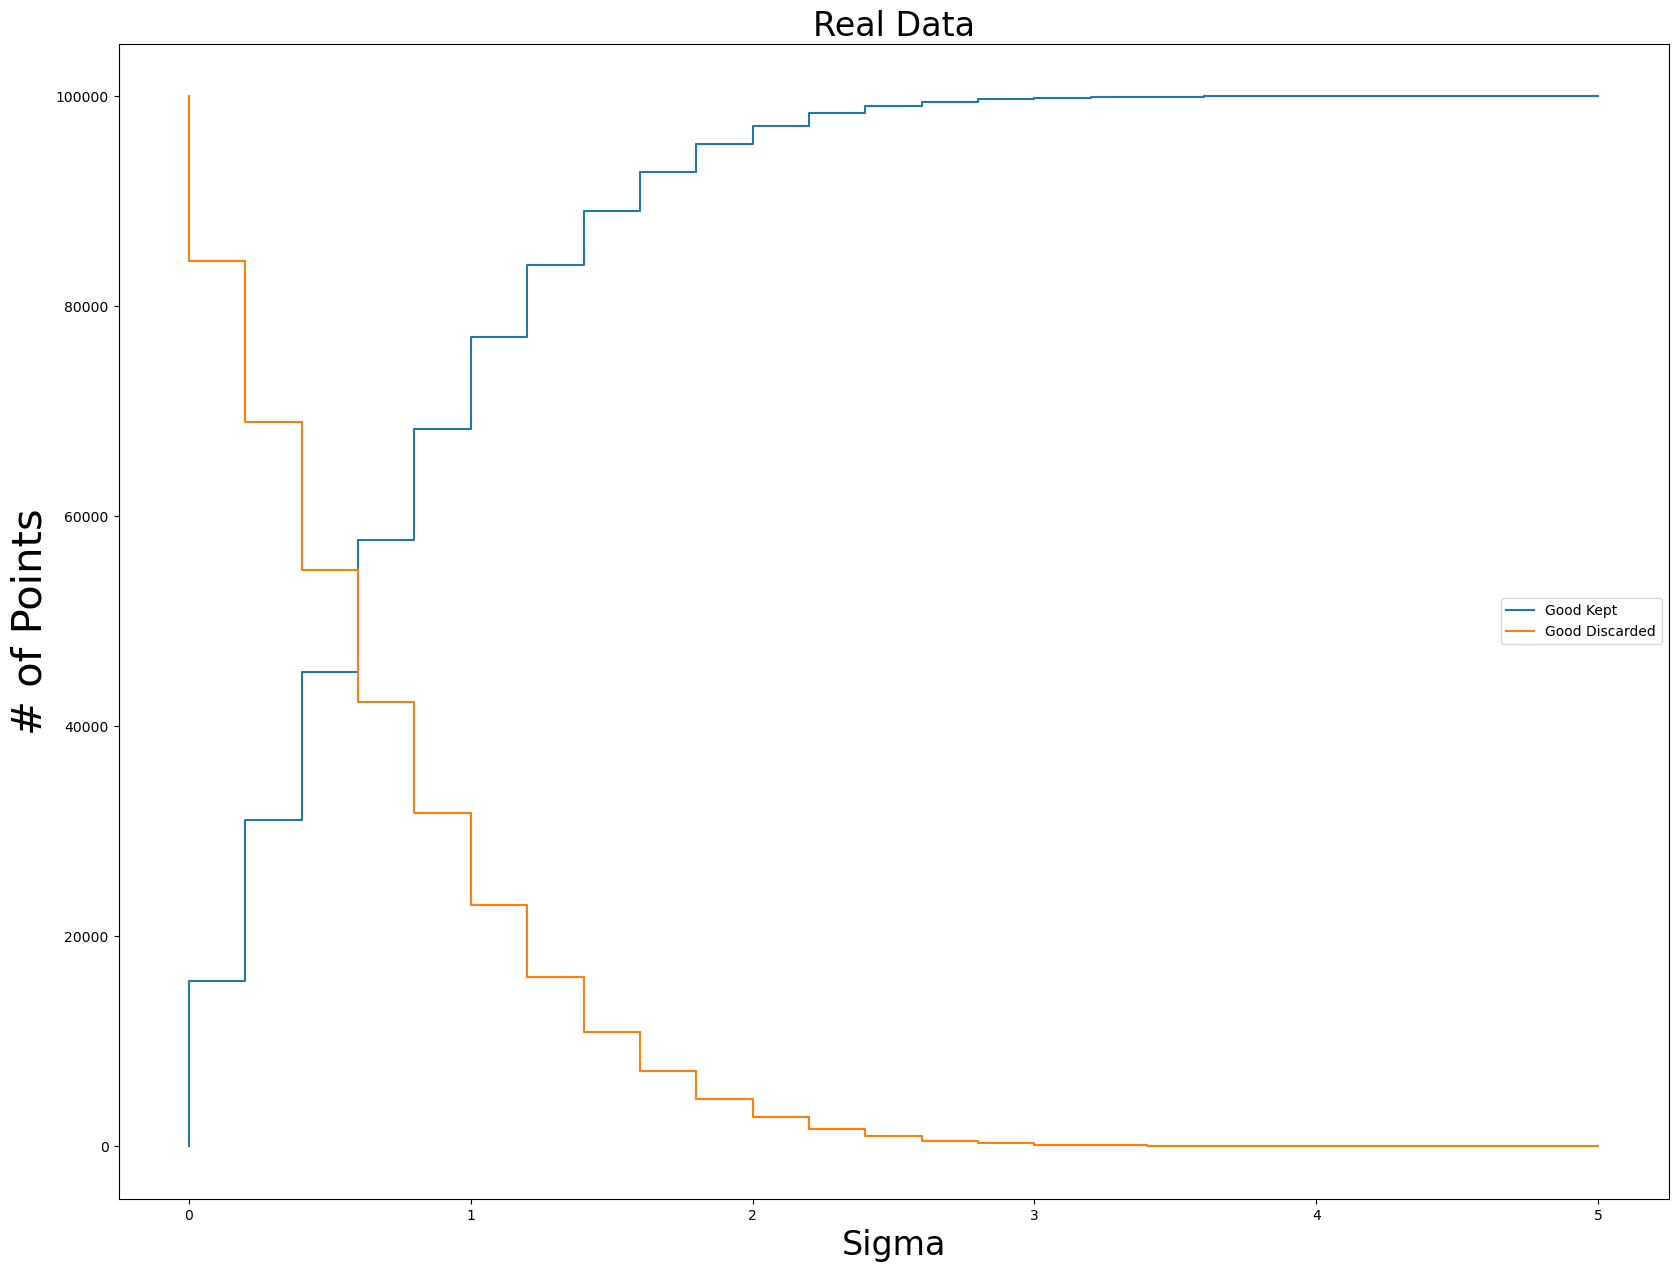

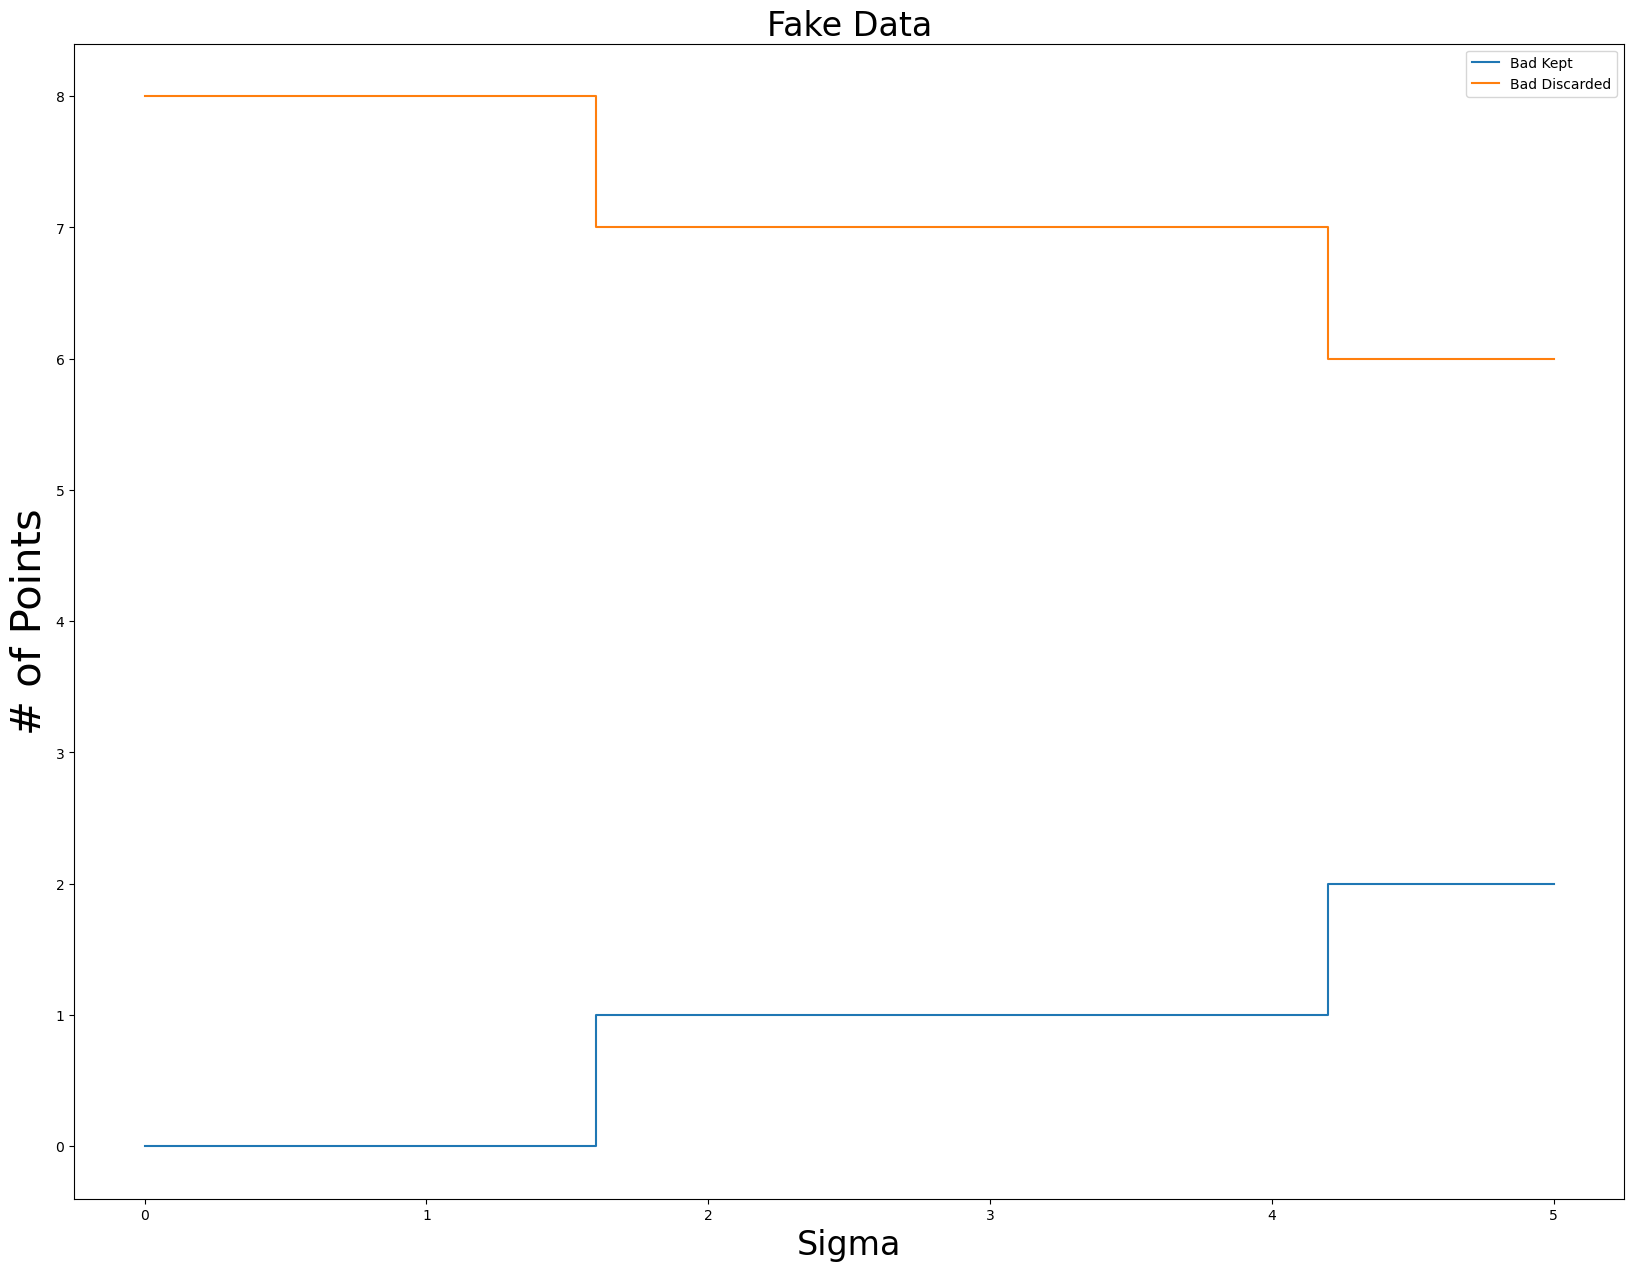

In [70]:

fig, ax = plt.subplots(1,1)
x = np.linspace(0,5,26)
plt.title("Real Data", fontsize = 24)
plt.xlabel("Sigma", fontsize = 24)
plt.ylabel("# of Points", fontsize = 30)
ax.step(x = x, y = goodtrue, label = "Good Kept")
ax.step(x = x, y = goodbad, label = "Good Discarded")
plt.legend(loc="best")

plt.show()

fig, ax = plt.subplots(1,1)
plt.title("Fake Data", fontsize = 24)
plt.xlabel("Sigma", fontsize = 24)
plt.ylabel("# of Points", fontsize = 30)
ax.step(x = x, y = badtrue, label = "Bad Kept")
ax.step(x = x, y = badbad, label = "Bad Discarded")
plt.legend(loc="best")

plt.show()

As we increase sigma, we start to include more and more of both the good and the bad data, with the rate of increase of the good data decreasing exponentially.

## C) Are there mistakes of commission (bad data getting in)? If yes, are they avoidable and how do they depend on your statistical threshold?

There are mistake of commission that are mostly unavoidable. When the bad data is within a reasonable distance from the mean, it is nearly impossible to remove without removing large portions of other data. In order to throw out all of the bad data, we need to throw out about 10% of the good data too.

# Problem 2

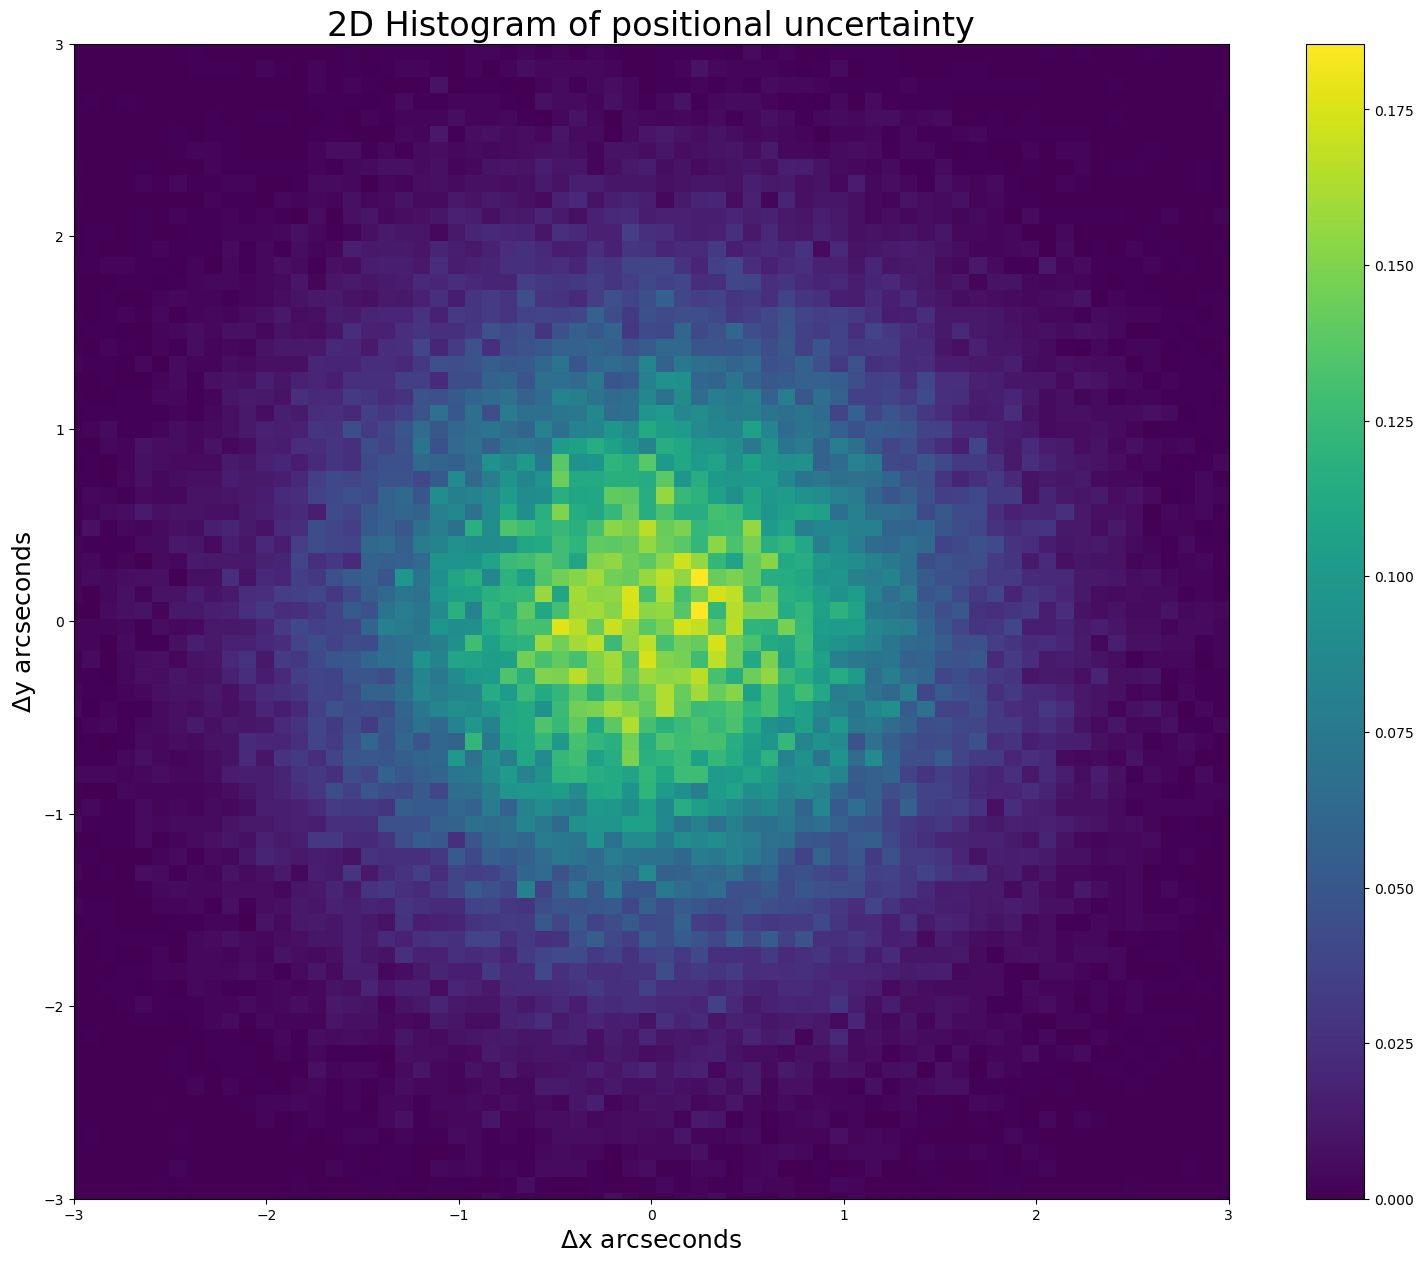

In [71]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

## 1) What is the question in words?

What is the probability that I see a measurement of a number of arcseconds corrosponding to 5 sigma or more away from the mean?

In [77]:
scipy.stats.rayleigh.isf(scipy.stats.norm.sf(5))

5.489079776062419

5 sigma in a rayleigh corrosponds to a distance of 5.49 arcseconds away from the mean.

## 2) What is the question in math?

Since we have 2 gaussian distributions, both with $\sigma$ of 1, we can replace this with a Rayleigh with a sigma of 1. Given this, we want to find the probability the backgroun generated a signal 